In [1]:
# Practical 2 — Email Spam Detection (for numeric word-count dataset)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')

In [2]:
# 1 Load the dataset
df = pd.read_csv("emails.csv")
print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
print("Columns:", df.columns[:10].tolist(), "...")

✅ Dataset loaded successfully
Shape: (3250, 3002)
Columns: ['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou'] ...


In [3]:
# 2 Separate features (X) and labels (y)
X = df.drop(columns=['Email No.', 'Prediction'], errors='ignore')
y = df['Prediction']

print("\nFeature matrix shape:", X.shape)
print("Label distribution:\n", y.value_counts())


Feature matrix shape: (3250, 3000)
Label distribution:
 Prediction
0    2330
1     920
Name: count, dtype: int64


In [4]:
# 3 Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [5]:
# 4 Train models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', probability=True, random_state=42)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [6]:
# 5 Predictions
pred_knn = knn.predict(X_test)
pred_svm = svm.predict(X_test)

In [7]:
# 6 Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print(classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


KNN Results:
Accuracy: 0.8881
              precision    recall  f1-score   support

           0     0.9539    0.8868    0.9191       583
           1     0.7565    0.8913    0.8184       230

    accuracy                         0.8881       813
   macro avg     0.8552    0.8890    0.8687       813
weighted avg     0.8980    0.8881    0.8906       813



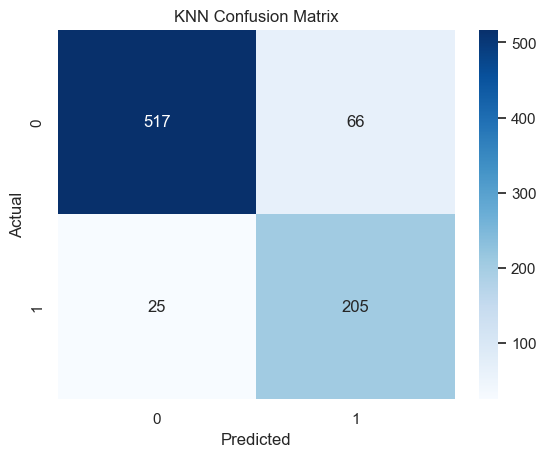


SVM Results:
Accuracy: 0.952
              precision    recall  f1-score   support

           0     0.9739    0.9588    0.9663       583
           1     0.8996    0.9348    0.9168       230

    accuracy                         0.9520       813
   macro avg     0.9367    0.9468    0.9416       813
weighted avg     0.9529    0.9520    0.9523       813



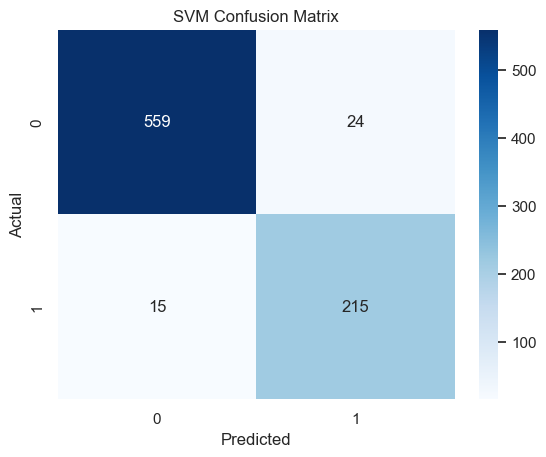

In [8]:
# 7 Evaluate both models
evaluate_model("KNN", y_test, pred_knn)
evaluate_model("SVM", y_test, pred_svm)

In [9]:
# 8 Compare both accuracies
acc_knn = accuracy_score(y_test, pred_knn)
acc_svm = accuracy_score(y_test, pred_svm)
print("\nModel Comparison:")
print(f"KNN Accuracy: {acc_knn:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")

if acc_svm > acc_knn:
    print("🏆 SVM performs better overall.")
else:
    print("🏆 KNN performs better overall.")


Model Comparison:
KNN Accuracy: 0.8881
SVM Accuracy: 0.9520
🏆 SVM performs better overall.


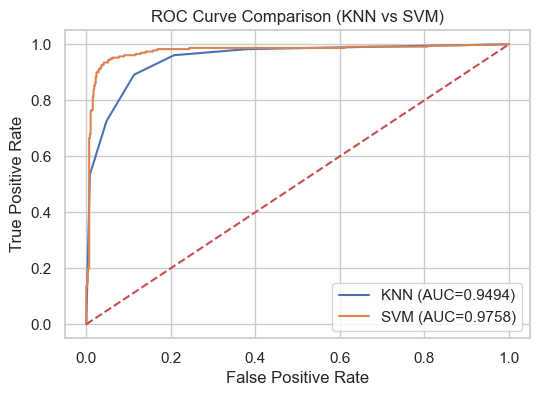

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc_knn:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.4f})')
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (KNN vs SVM)")
plt.legend()
plt.show()
